1. X̄-R Chart (Mean & Range Chart)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Simulasi data: 10 sampel, masing-masing 5 sub-kelompok
np.random.seed(42)
samples = np.random.normal(loc=50, scale=2, size=(10, 5))

In [3]:
# Hitung rata-rata dan range tiap sub-kelompok
means = samples.mean(axis=1)
ranges = samples.max(axis=1) - samples.min(axis=1)

In [4]:
# Hitung CL, UCL, LCL
X_bar = means.mean()
R_bar = ranges.mean()

UCL_X = X_bar + 0.577 * R_bar
LCL_X = X_bar - 0.577 * R_bar
UCL_R = R_bar * 2.114
LCL_R = R_bar * 0.0  # Range tidak bisa negatif

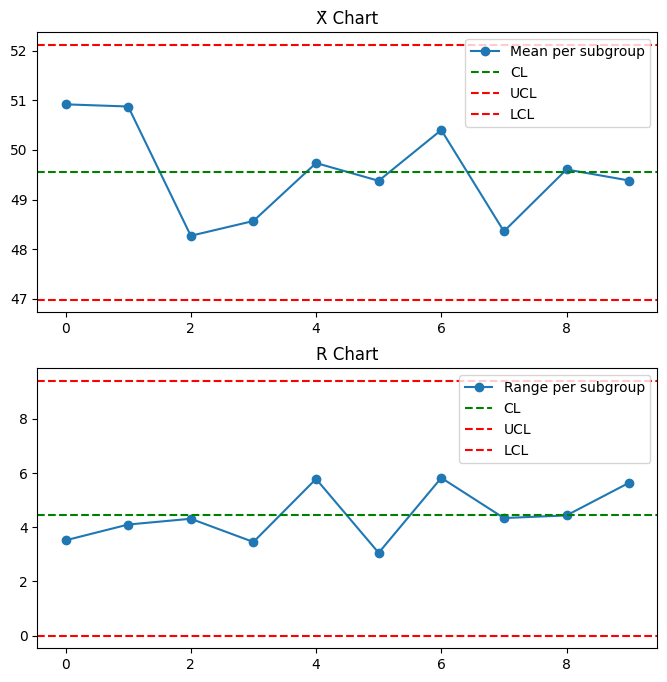

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

# Plot X̄ Chart
ax[0].plot(means, marker='o', linestyle='-', label="Mean per subgroup")
ax[0].axhline(X_bar, color='green', linestyle='--', label="CL")
ax[0].axhline(UCL_X, color='red', linestyle='--', label="UCL")
ax[0].axhline(LCL_X, color='red', linestyle='--', label="LCL")
ax[0].set_title("X̄ Chart")
ax[0].legend()

# Plot R Chart
ax[1].plot(ranges, marker='o', linestyle='-', label="Range per subgroup")
ax[1].axhline(R_bar, color='green', linestyle='--', label="CL")
ax[1].axhline(UCL_R, color='red', linestyle='--', label="UCL")
ax[1].axhline(LCL_R, color='red', linestyle='--', label="LCL")
ax[1].set_title("R Chart")
ax[1].legend()

plt.show()

2. X̄-S Chart (Mean & Standard Deviation Chart)

In [ ]:
std_devs = samples.std(axis=1, ddof=1)  # Standard deviasi tiap sub-kelompok
S_bar = std_devs.mean()

In [ ]:
UCL_S = S_bar * 1.924
LCL_S = S_bar * 0.0  # Std Dev tidak bisa negatif

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

# X̄ Chart
ax[0].plot(means, marker='o', linestyle='-', label="Mean per subgroup")
ax[0].axhline(X_bar, color='green', linestyle='--', label="CL")
ax[0].axhline(UCL_X, color='red', linestyle='--', label="UCL")
ax[0].axhline(LCL_X, color='red', linestyle='--', label="LCL")
ax[0].set_title("X̄ Chart")
ax[0].legend()

# S Chart
ax[1].plot(std_devs, marker='o', linestyle='-', label="Std Dev per subgroup")
ax[1].axhline(S_bar, color='green', linestyle='--', label="CL")
ax[1].axhline(UCL_S, color='red', linestyle='--', label="UCL")
ax[1].axhline(LCL_S, color='red', linestyle='--', label="LCL")
ax[1].set_title("S Chart")
ax[1].legend()

plt.show()

3. p-Chart (Proportion of Defective Items)

In [ ]:
n = 100  # Sampel per subgrup
defect_counts = np.random.binomial(n, 0.05, size=10)
p_bar = defect_counts.sum() / (n * 10)
UCL_p = p_bar + 3 * np.sqrt((p_bar * (1 - p_bar)) / n)
LCL_p = max(0, p_bar - 3 * np.sqrt((p_bar * (1 - p_bar)) / n))

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(defect_counts / n, marker='o', linestyle='-', label="p")
plt.axhline(p_bar, color='green', linestyle='--', label="CL")
plt.axhline(UCL_p, color='red', linestyle='--', label="UCL")
plt.axhline(LCL_p, color='red', linestyle='--', label="LCL")
plt.title("p-Chart")
plt.legend()
plt.show()

4. np-Chart (Number of Defective Items)

In [ ]:
UCL_np = n * UCL_p
LCL_np = n * LCL_p

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(defect_counts, marker='o', linestyle='-', label="np")
plt.axhline(n * p_bar, color='green', linestyle='--', label="CL")
plt.axhline(UCL_np, color='red', linestyle='--', label="UCL")
plt.axhline(LCL_np, color='red', linestyle='--', label="LCL")
plt.title("np-Chart")
plt.legend()
plt.show()

In [ ]:
5. c-Chart (Defects Per Unit)

In [ ]:
c_values = np.random.poisson(4, size=10)
c_bar = np.mean(c_values)
UCL_c = c_bar + 3 * np.sqrt(c_bar)
LCL_c = max(0, c_bar - 3 * np.sqrt(c_bar))

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(c_values, marker='o', linestyle='-', label="c")
plt.axhline(c_bar, color='green', linestyle='--', label="CL")
plt.axhline(UCL_c, color='red', linestyle='--', label="UCL")
plt.axhline(LCL_c, color='red', linestyle='--', label="LCL")
plt.title("c-Chart")
plt.legend()
plt.show()

6. u-Chart (Defects Per Unit with Varying Sample Sizes)

In [ ]:
n_values = np.random.randint(80, 120, size=10)
u_values = c_values / n_values
u_bar = np.mean(u_values)
UCL_u = u_bar + 3 * np.sqrt(u_bar / np.mean(n_values))
LCL_u = max(0, u_bar - 3 * np.sqrt(u_bar / np.mean(n_values)))

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(u_values, marker='o', linestyle='-', label="u")
plt.axhline(u_bar, color='green', linestyle='--', label="CL")
plt.axhline(UCL_u, color='red', linestyle='--', label="UCL")
plt.axhline(LCL_u, color='red', linestyle='--', label="LCL")
plt.title("u-Chart")
plt.legend()
plt.show()